In [1]:
dados ='/home/dev/PycharmProjects/FallDetection/dadosfreq.npy'
rotulos ='/home/dev/PycharmProjects/FallDetection/rotulosfreq.npy'

In [2]:
import numpy as np
X = np.load(dados)
y = np.load(rotulos)

In [3]:
novo_X = []

for i in X:
    novo_array = i[:200]
    novo_X.append(novo_array)
    
X = novo_X
X = np.asarray(X)

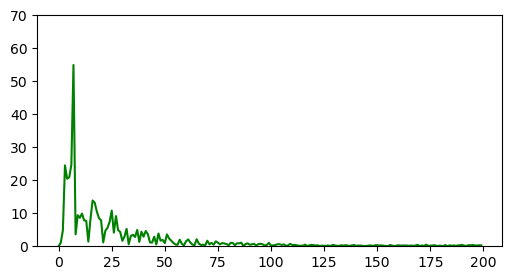

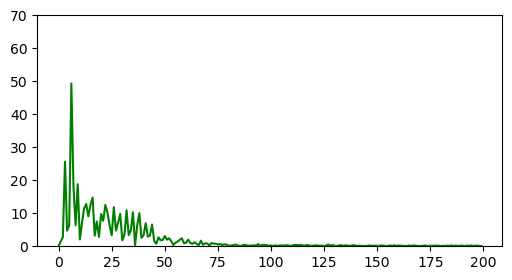

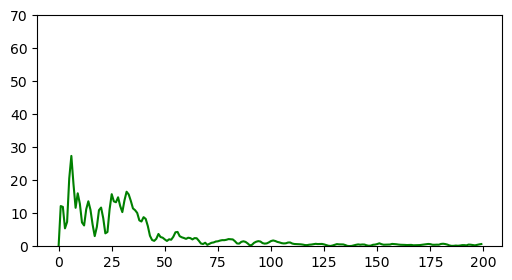

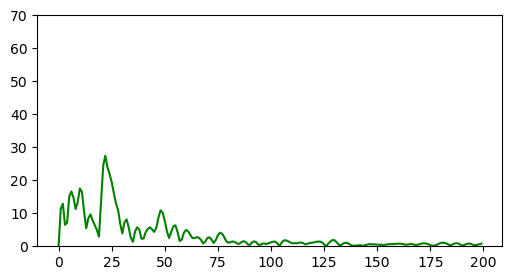

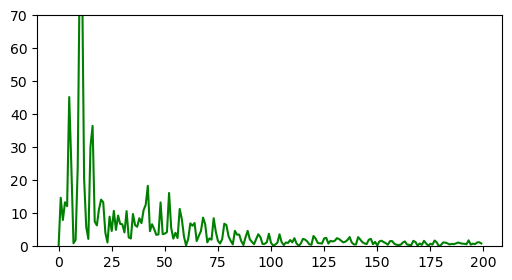

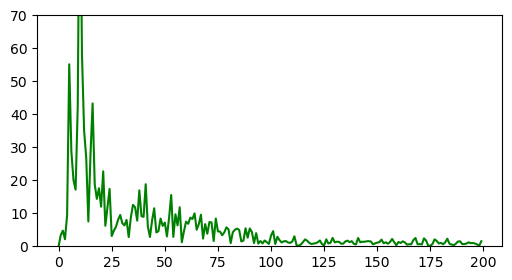

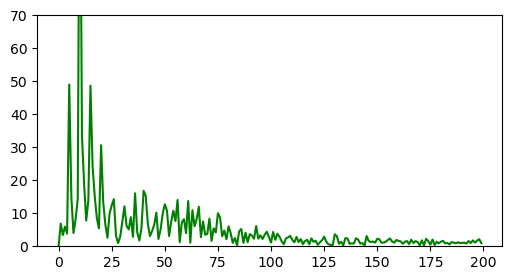

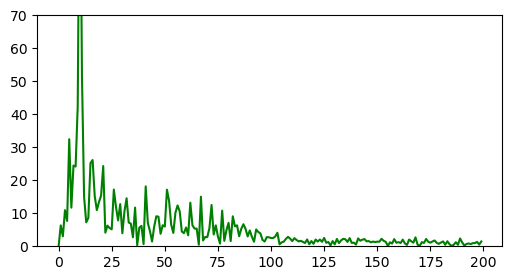

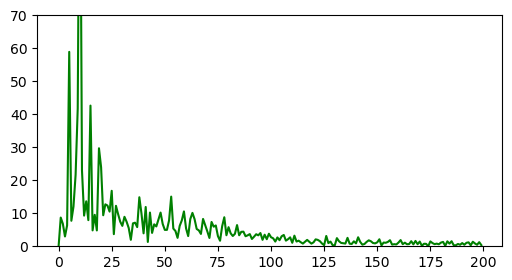

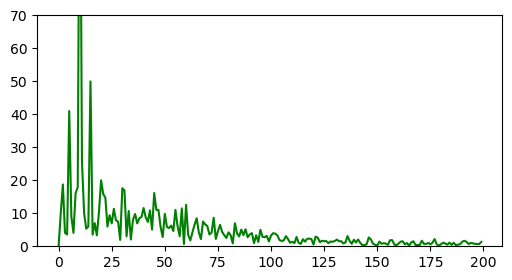

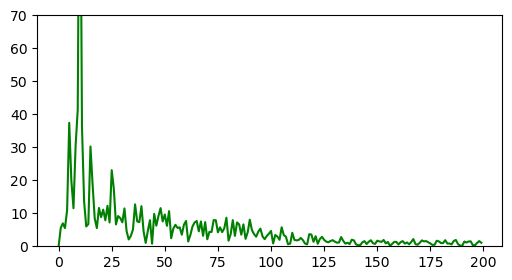

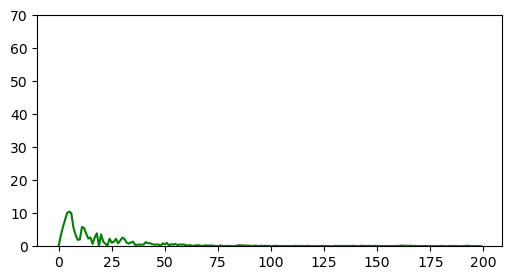

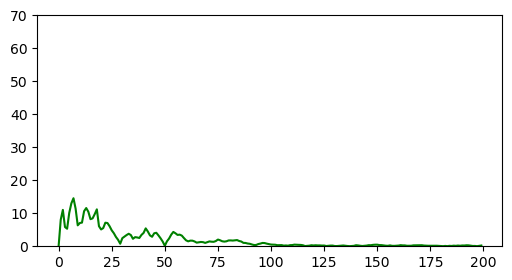

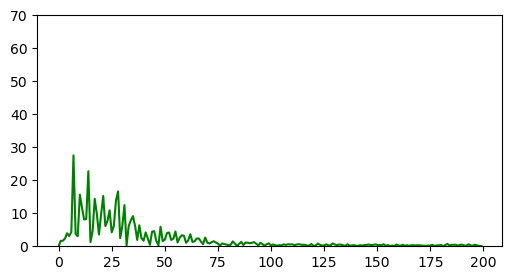

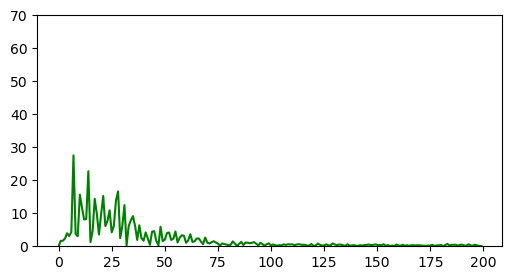

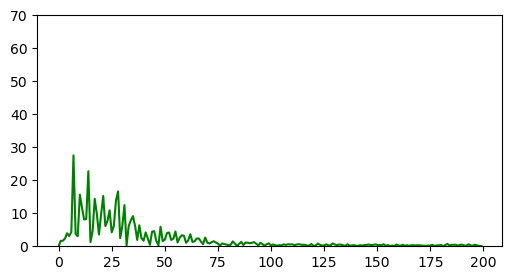

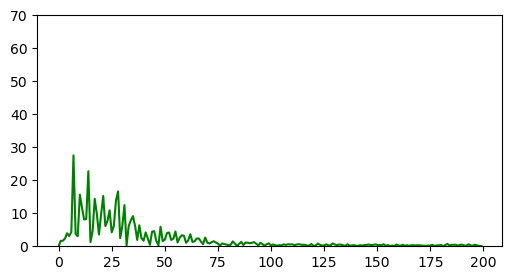

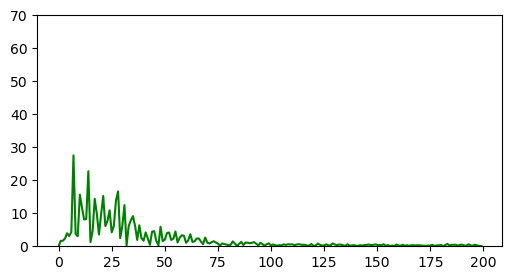

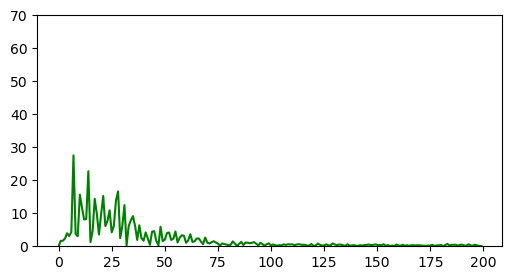

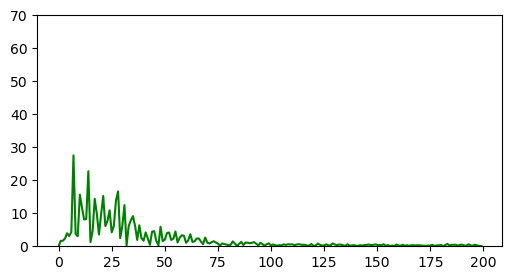

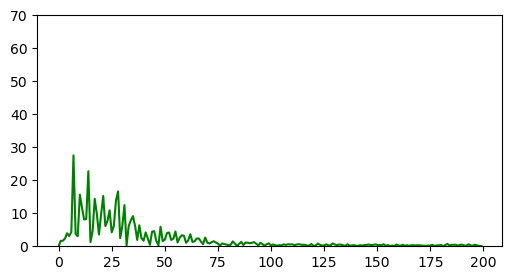

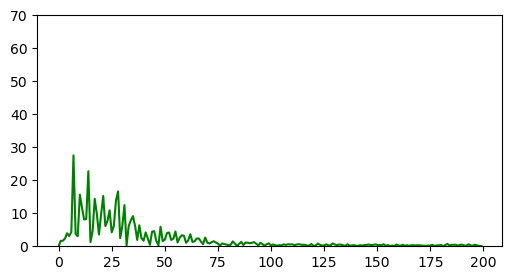

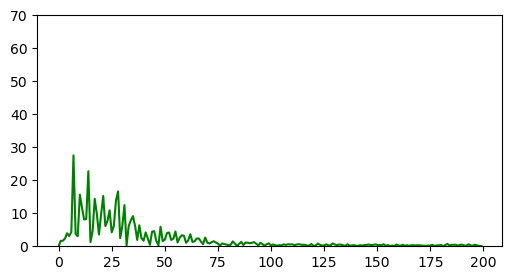

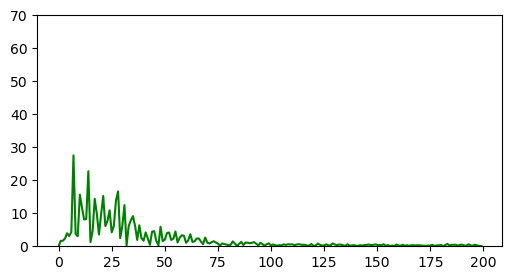

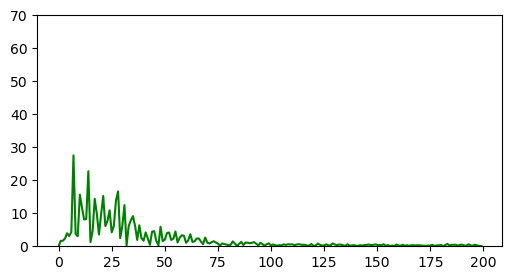

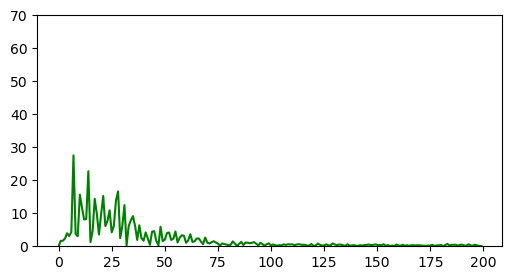

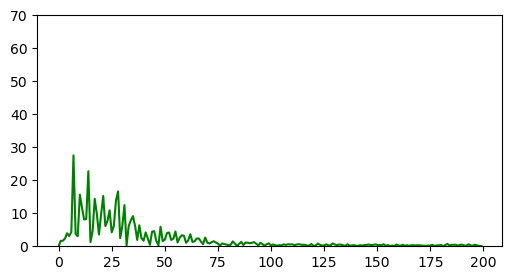

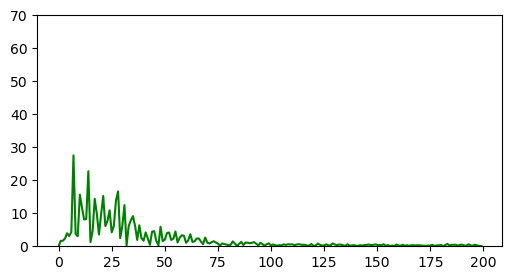

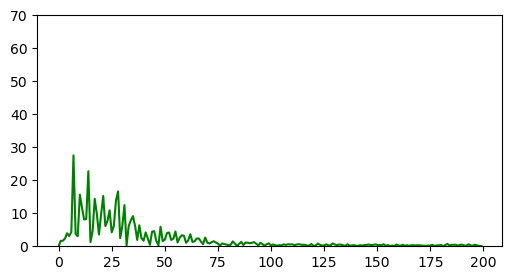

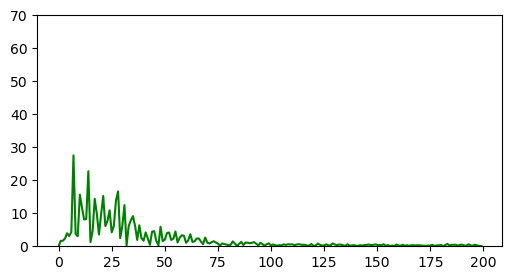

In [4]:
import matplotlib.pyplot as plt
for i in range(30):
    plt.figure(figsize=(6,3))
    plt.ylim(0,70)
    plt.plot((X[i]), "-g")
    plt.show()

In [5]:
from sklearn.model_selection import train_test_split

# Dividindo os dados em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Dividindo o conjunto de treinamento em conjunto de treinamento e validação
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)



In [6]:
X_train.shape

(988, 200, 1)

In [7]:
X_test.shape

(309, 200, 1)

In [8]:
X_val.shape

(247, 200, 1)

In [9]:
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_val = to_categorical(y_val)

2023-05-24 11:46:02.828268: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-24 11:46:02.864279: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-24 11:46:02.864774: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-24 11:46:03.547125: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [10]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [11]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout,Conv1D,Flatten,MaxPooling1D

kernel_size = 3
pool_size=2
dropout = 0.2

model = keras.Sequential()


model.add(Conv1D(filters=32, kernel_size=kernel_size, activation='relu', input_shape=(200,1)))
model.add(MaxPooling1D(pool_size= pool_size))
model.add(Dropout(dropout))

model.add(Conv1D(filters=64, kernel_size=kernel_size, activation='relu'))
model.add(MaxPooling1D(pool_size=pool_size))
model.add(Dropout(dropout))

model.add(Conv1D(filters=128, kernel_size=kernel_size, activation='relu'))
model.add(MaxPooling1D(pool_size=pool_size))
model.add(Dropout(dropout))

model.add(Conv1D(filters=256, kernel_size=kernel_size, activation='relu'))
model.add(MaxPooling1D(pool_size=pool_size))
model.add(Dropout(dropout))

#model.add(Conv1D(filters=512, kernel_size=3, activation='relu'))
#model.add(MaxPooling1D(pool_size=2))
#model.add(Dropout(0.2))

#model.add(Conv1D(filters=1024, kernel_size=3, activation='relu'))
#model.add(MaxPooling1D(pool_size=2))
#model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
#model.add(Dense(256, activation='relu'))
model.add(Dense(8, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])




2023-05-24 11:46:04.348134: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-05-24 11:46:04.348979: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [12]:
historico = model.fit(X_train,y_train,batch_size= 32,epochs = 35, validation_data = (X_val,y_val),verbose =1)

Epoch 1/35
31/31 [==============================] - 2s 23ms/step - loss: 1.5420 - accuracy: 0.4868 - val_loss: 1.0619 - val_accuracy: 0.7692
Epoch 2/35
31/31 [==============================] - 1s 18ms/step - loss: 0.7586 - accuracy: 0.7490 - val_loss: 0.5967 - val_accuracy: 0.7773
Epoch 3/35
31/31 [==============================] - 1s 17ms/step - loss: 0.4546 - accuracy: 0.8300 - val_loss: 0.3505 - val_accuracy: 0.8785
Epoch 4/35
31/31 [==============================] - 1s 17ms/step - loss: 0.3669 - accuracy: 0.8522 - val_loss: 0.4774 - val_accuracy: 0.8097
Epoch 5/35
31/31 [==============================] - 1s 17ms/step - loss: 0.3959 - accuracy: 0.8553 - val_loss: 0.3266 - val_accuracy: 0.8664
Epoch 6/35
31/31 [==============================] - 1s 17ms/step - loss: 0.3620 - accuracy: 0.8623 - val_loss: 0.2436 - val_accuracy: 0.9312
Epoch 7/35
31/31 [==============================] - 1s 17ms/step - loss: 0.2340 - accuracy: 0.9170 - val_loss: 0.2389 - val_accuracy: 0.9271
Epoch 8/35
31

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 198, 32)           128       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 99, 32)           0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 99, 32)            0         
                                                                 
 conv1d_1 (Conv1D)           (None, 97, 64)            6208      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 48, 64)           0         
 1D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 48, 64)            0

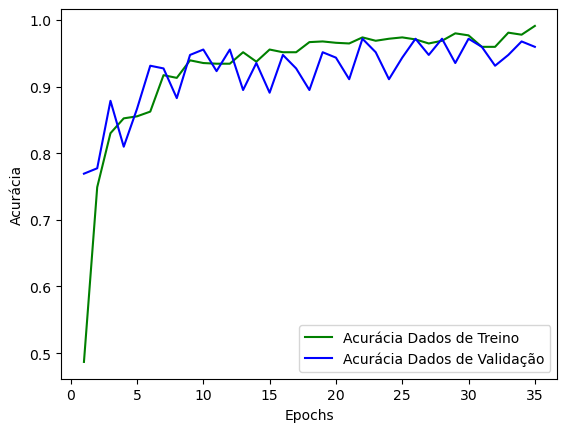

In [14]:
import matplotlib.pyplot as plt


acuracia_treino = historico.history['accuracy'] 
acuracia_val = historico.history['val_accuracy']

epochs = range(1, len(acuracia_treino)+1) 

plt.plot(epochs,acuracia_treino, "-g", label="Acurácia Dados de Treino") 
plt.plot(epochs,acuracia_val, "-b", label = "Acurácia Dados de Validação")
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Acurácia')
plt.show()

10/10 [==============================] - 0s 4ms/step


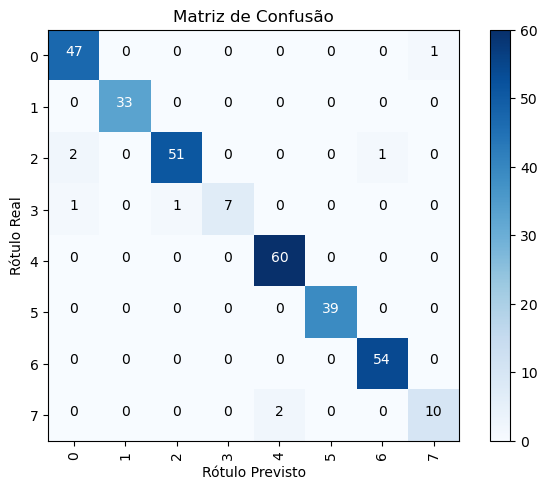

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import itertools
from sklearn.metrics import confusion_matrix

# Obtendo as probabilidades das classes previstas
y_pred_probs = model.predict(X_test)

# Obtendo as classes previstas
y_pred = np.argmax(y_pred_probs, axis=1)

# Obtendo as classes reais
y_true = np.argmax(y_test, axis=1)

# Calculando a matriz de confusão
cm = confusion_matrix(y_true, y_pred)

# Plotando a matriz de confusão
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title('Matriz de Confusão')
plt.colorbar()
tick_marks = np.arange(0, 8)
plt.xticks(tick_marks, rotation=90)
plt.yticks(tick_marks)

# Adicionando os números nas células da matriz
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], 'd'),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('Rótulo Real')
plt.xlabel('Rótulo Previsto')
plt.show()


In [16]:
from sklearn.metrics import classification_report


target_names = np.arange(0, 8).astype(str)
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96        48
           1       1.00      1.00      1.00        33
           2       0.98      0.94      0.96        54
           3       1.00      0.78      0.88         9
           4       0.97      1.00      0.98        60
           5       1.00      1.00      1.00        39
           6       0.98      1.00      0.99        54
           7       0.91      0.83      0.87        12

    accuracy                           0.97       309
   macro avg       0.97      0.94      0.96       309
weighted avg       0.97      0.97      0.97       309

